#   "Preprocessing Steps" ON housing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [464]:
data=pd.read_csv("housing2.csv")

In [465]:
sns.set(rc={'figure.figsize':(15, 6)})

In [466]:
data.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

C:\Users\apeer\AppData\Local\Temp\ipykernel_3580\98669841.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  data.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
nan,37.880000,41.000000,880,129.000000,322.000000,126,8.325200,452600,NEAR BAY,male
-122.220000,37.860000,21.000000,7099,1106.000000,2401.000000,1138,8.301400,358500,NEAR BAY,female
-122.240000,37.850000,52.000000,1467,190.000000,496.000000,177,7.257400,352100,NEAR BAY,male
-122.250000,37.850000,52.000000,1274,235.000000,558.000000,219,5.643100,341300,NEAR BAY,female
-122.250000,37.850000,nan,1627,280.000000,nan,259,3.846200,342200,NEAR BAY,male


In [467]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,median_house_value
count,20638.000000,20640.000000,20382.000000,20640.000000,15758.000000,20596.000000,17873.000000,20640.000000
mean,-119.569632,35.631861,28.676283,2635.763081,539.920104,1424.928724,3.939403,206855.816909
std,2.003527,2.135952,12.589284,2181.615252,419.834171,1132.237768,1.943517,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,2.598600,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,3.587100,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,652.000000,1725.000000,4.830400,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,15.000100,500001.000000


In [468]:
data.isnull().sum()

longitude                2
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

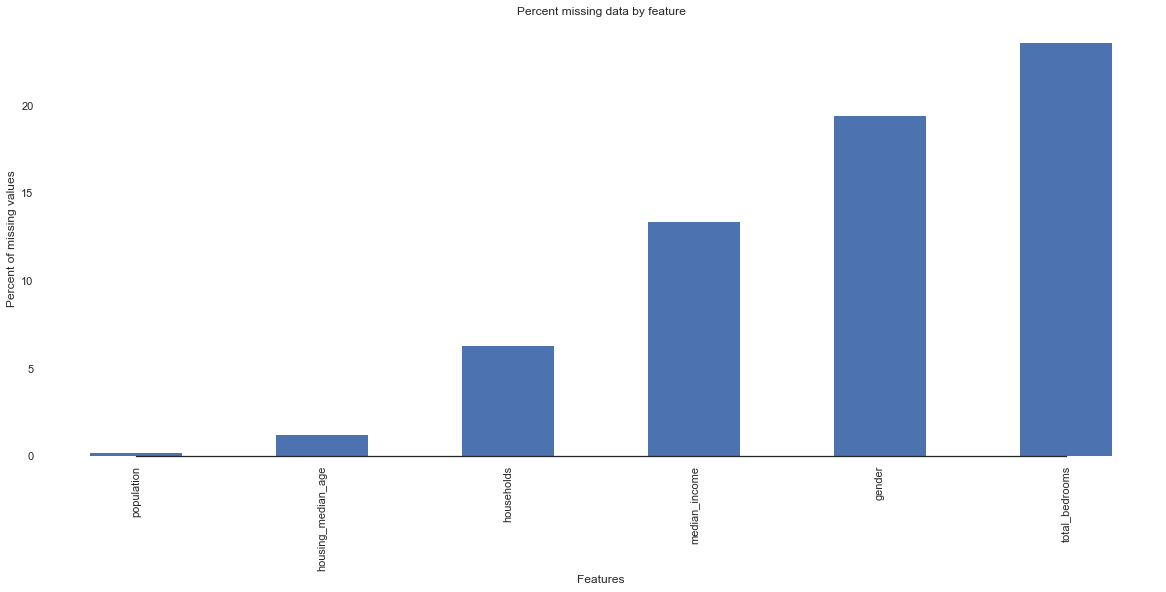

In [469]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 8))
palette_color = sns.color_palette('ch:s=-.2,r=.6')
sns.set_color_codes(palette="deep")
missing = round(data.isnull().mean()*100,2)
missing = missing[missing >= 0.05]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

We'll start with DROPING useless data

In [470]:
for i in data.index:
    a=[]
    for j in data.columns:
        if pd.notnull(data[j][i]):
            a.append(data[j][i])
    if len(a) <= 9:
        data.drop(index=i,inplace=True)
        
    

In [471]:
#data.dropna(axis='rows', thresh=3)

In [472]:
data.isnull().sum()

longitude                2
latitude                 0
housing_median_age      16
total_rooms              0
total_bedrooms        3074
population              16
households              51
median_income         1997
median_house_value       0
ocean_proximity          0
gender                2983
dtype: int64

our first coulmn we will start with:"median_income"

In [473]:
median_income_mody=data["median_income"].copy()
median_income_mody.fillna(value=data["median_income"].mean(),inplace=True)

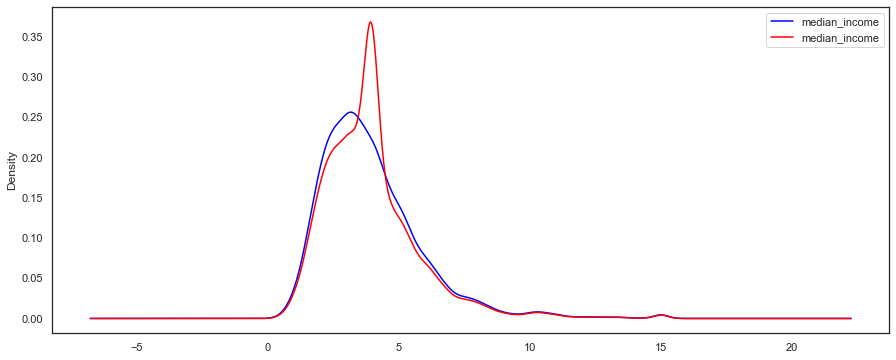

In [474]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['median_income'].plot(kind='kde', ax=ax,color='blue')
median_income_mody.plot(kind='kde', ax=ax, color='red')
ax.legend( loc='best')

seems that it has a bias

In [475]:
#interpolate() METHOD
median_income_mody=data["median_income"].copy()
median_income_mody.interpolate(method ='linear',order=2 ,inplace=True)

In [476]:
median_income_mody.isnull().sum()

0

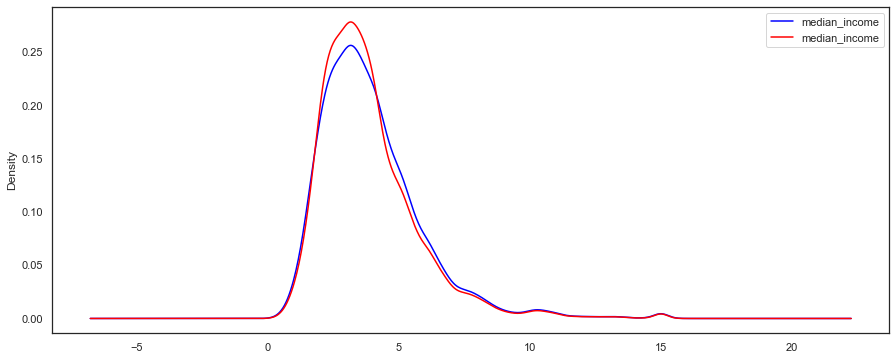

In [477]:
# Checking the difference between original and imputed fearure with the help of graph
fig = plt.figure()
ax = fig.add_subplot(111)
data['median_income'].plot(kind='kde', ax=ax,color='blue')
median_income_mody.plot(kind='kde', ax=ax, color='red')
ax.legend( loc='best')

that's more better than the last one

We will applay it now

In [478]:
data['median_income'].interpolate(method ='linear',order=2 ,inplace=True)

In [479]:
data.isnull().sum()

longitude                2
latitude                 0
housing_median_age      16
total_rooms              0
total_bedrooms        3074
population              16
households              51
median_income            0
median_house_value       0
ocean_proximity          0
gender                2983
dtype: int64

Second column is : "gender" we will try to fill null values 

In [480]:
colors=cyan_grad
labels=data['gender'].dropna().unique()
order=data['gender'].value_counts().index

In [481]:
# --- Create List of Color Palletes ---
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

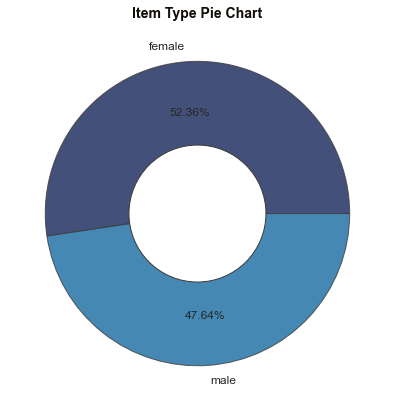

In [482]:
# --- Pie Chart ---
plt.figure(figsize=(9, 7))
plt.title('Item Type Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(data["gender"].value_counts(), labels=order, colors=colors, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

In [483]:
fill_list = ['female' , 'male']
data['gender'] = data['gender'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

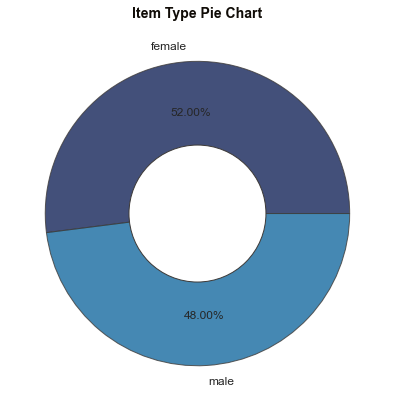

In [484]:
# --- Pie Chart ---
plt.figure(figsize=(9, 7))
plt.title('Item Type Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(data["gender"].value_counts(), labels=order, colors=colors, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

There is no change almost after filling it so we apply it easly

"housing_median_age" , "population" , "longitude" All of them have little missing values so we can easly fill them by their means

In [485]:
data['housing_median_age'] = data['housing_median_age'].replace(np.nan,round(data['housing_median_age'].mean()))
data['population'] = data['population'].replace(np.nan,round(data['population'].mean()))
data['longitude'] = data['longitude'].replace(np.nan,round(data['longitude'].mean()))

In [486]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        3074
population               0
households              51
median_income            0
median_house_value       0
ocean_proximity          0
gender                   0
dtype: int64

Now it's turn of "total_bedrooms" it has large missing values 3074 so we will try some ways more suitable 

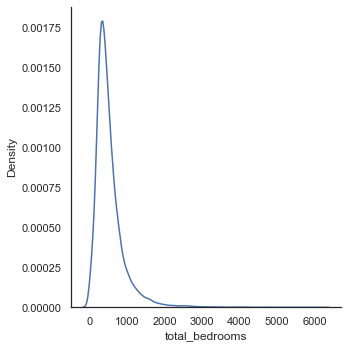

In [487]:
sns.displot(data['total_bedrooms'], kind='kde')

In [431]:
total_bedrooms_mody1=data['total_bedrooms'].fillna(method='ffill')

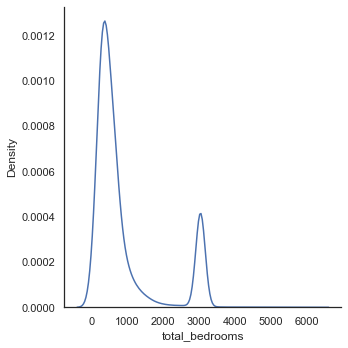

In [432]:
sns.displot(total_bedrooms_mody1, kind='kde')

This way has alot bias

In [535]:
total_bedrooms_mody2=data["total_bedrooms"].copy()
total_bedrooms_mody2.interpolate(method='slinear',inplace=True,order=1)

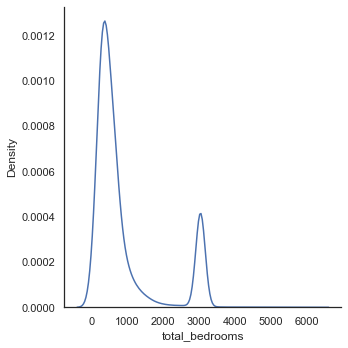

In [536]:
sns.displot(total_bedrooms_mody1, kind='kde')

not good at all

In [529]:
total_bedrooms_mody3=data["total_bedrooms"].copy()
total_bedrooms_mody3.interpolate(method ='pchip',inplace=True, order=1)
#pchip,slinear

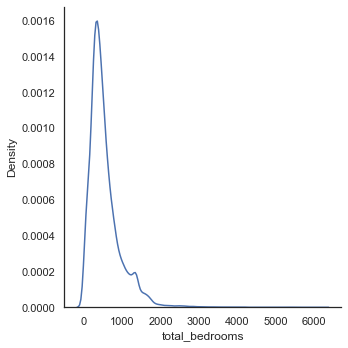

In [530]:
sns.displot(total_bedrooms_mody3, kind='kde')

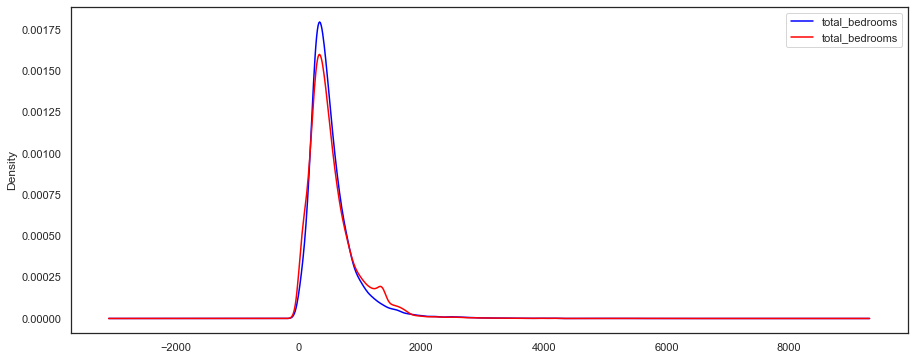

In [435]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['total_bedrooms'].plot(kind='kde', ax=ax,color='blue')
total_bedrooms_mody2.plot(kind='kde', ax=ax, color='red')
ax.legend( loc='best')

That's little good than the others

let's apply it

In [436]:
data['total_bedrooms'].interpolate(method ='pchip',inplace=True, order=1)

In [437]:
data.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms         0
population             0
households            51
median_income          0
median_house_value     0
ocean_proximity        0
gender                 0
dtype: int64

The last column is "households" AS this column may be MANR So we can replace it with modes 

In [438]:
data['households'].mode().sum()

'no'

In [439]:
data['households'] = data['households'].replace(np.nan,'no')

In [440]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

<AxesSubplot:>

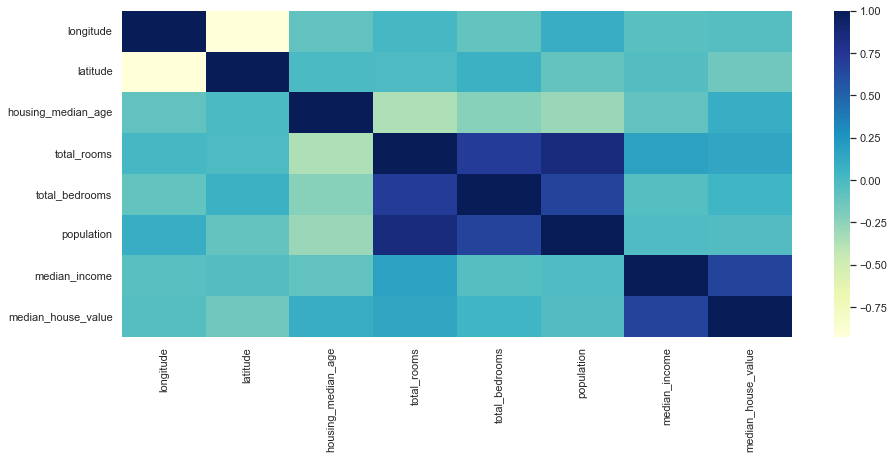

In [441]:
sns.heatmap(data.corr(), cmap = "YlGnBu")  

Now we will convert "Ctegorical columns" to continuous to can deal with it

In [442]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

In [443]:
from sklearn.preprocessing import LabelEncoder

In [444]:
model_trans = LabelEncoder()
data['gender'] = model_trans.fit_transform(data['gender'])
data['ocean_proximity'] = model_trans.fit_transform(data['ocean_proximity'])
data['households'] = model_trans.fit_transform(data['households'])

In [449]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-120.00,37.88,41.0,880,129.0,322.0,248,8.3252,452600,3,1
1,-122.22,37.86,21.0,7099,1106.0,2401.0,141,8.3014,358500,3,0
2,-122.24,37.85,52.0,1467,190.0,496.0,558,7.2574,352100,3,1
3,-122.25,37.85,52.0,1274,235.0,558.0,689,5.6431,341300,3,0
13,-122.26,37.84,52.0,696,191.0,345.0,1652,2.6736,191300,3,0
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,897,1.5603,78100,1,0
20636,-121.21,39.49,18.0,697,150.0,356.0,143,2.5568,77100,1,1
20637,-121.22,39.43,17.0,2254,485.0,1007.0,1026,1.7000,92300,1,0
20638,-121.32,39.43,18.0,1860,409.0,741.0,921,1.8672,84700,1,1


In [450]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18314 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18314 non-null  float64
 1   latitude            18314 non-null  float64
 2   housing_median_age  18314 non-null  float64
 3   total_rooms         18314 non-null  int64  
 4   total_bedrooms      18314 non-null  float64
 5   population          18314 non-null  float64
 6   households          18314 non-null  int32  
 7   median_income       18314 non-null  float64
 8   median_house_value  18314 non-null  int64  
 9   ocean_proximity     18314 non-null  int32  
 10  gender              18314 non-null  int32  
dtypes: float64(6), int32(3), int64(2)
memory usage: 2.0 MB


<AxesSubplot:>

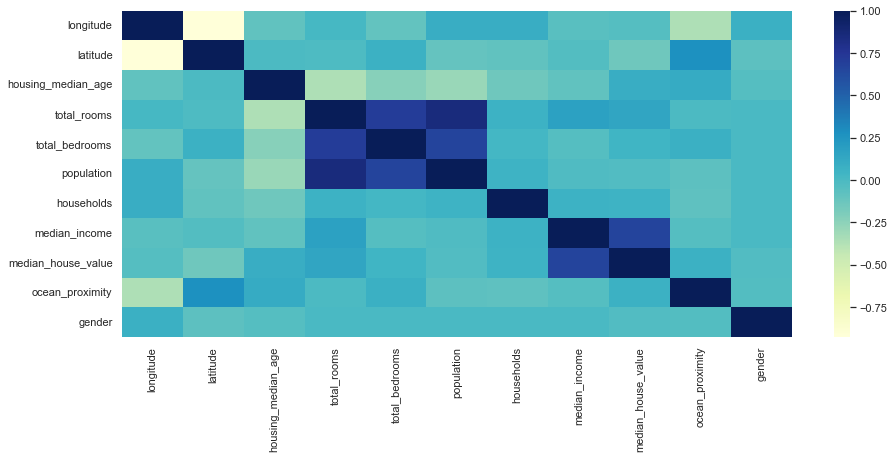

In [451]:
sns.heatmap(data.corr(), cmap = "YlGnBu")  

It seems that "total_rooms" , "total_bedrooms" and "median_income" have high correlation

In [ ]:
#Regression imputation
from sklearn.impute import SimpleImputer
#Specify the strategy to be the median class
fea_transformer = SimpleImputer(strategy="median")
values = fea_transformer.fit_transform(data[["housing_median_age"]])
pd.DataFrame(values)

In [8]:
import numpy as np
from numba import njit

@njit
def fillna_npwhere_njit(array, values):
    if np.isnan(array.sum()):
        array = np.where(np.isnan(array), values, array)
    return array